In [1]:
# import the necessary packages
from matplotlib import pyplot as plt

import numpy as np
import imutils
import cv2

In [ ]:
################################################################################
#
#       1.4.1 Translation
#
################################################################################

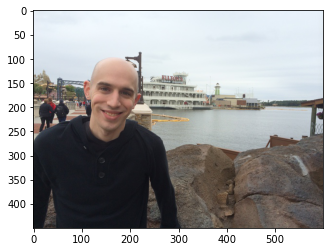

In [2]:
# load the image and show some basic information on it
image = cv2.imread('florida_trip.png')
# import the necessary packages

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


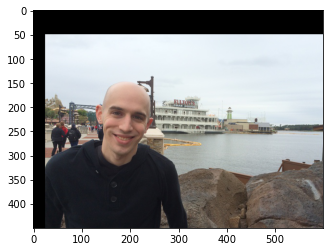

In [3]:
# NOTE: Translating (shifting) an image is given by a NumPy matrix in the form:
#	[[1, 0, shiftX], [0, 1, shiftY]]

# You simply need to specify how many pixels you want to shift the image
# in the X and Y direction -- let's translate the image 25 pixels to the
# right and 50 pixels down

M = np.float32([[1, 0, 25], [0, 1, 50]])

#       = cv2.warpAffine( input_image, translation_matrix, (w,h))
shifted = cv2.warpAffine(    image,     M,            (image.shape[1], image.shape[0]))

plt.imshow(cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB))


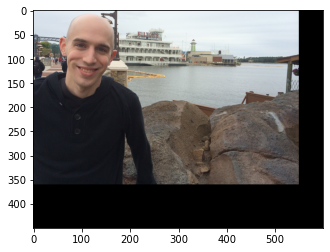

In [4]:
# now, let's shift the image 50 pixels to the left and 90 pixels up, we
# accomplish this using negative values
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt.imshow(cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB))


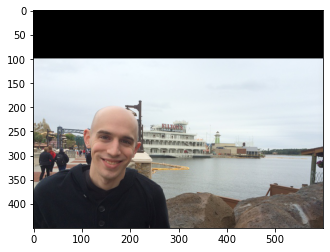

In [5]:
# finally, let's use our helper function in imutils to shift the image down 100 pixels
shifted = imutils.translate(image, 0, 100)
plt.imshow(cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB))


In [ ]:
################################################################################
#
#       1.4.2 Rotation      R (rotated) = I(input)*M(rotation_matrix)
#
################################################################################

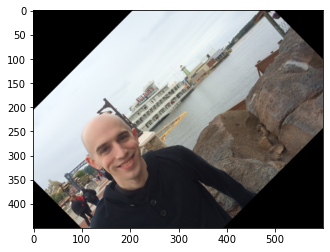

In [6]:
# grab the dimensions of the image and calculate the center of the image
(h, w) = image.shape[:2]
(cX, cY) = (w / 2, h / 2)

# rotate our image by 45 degrees
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))


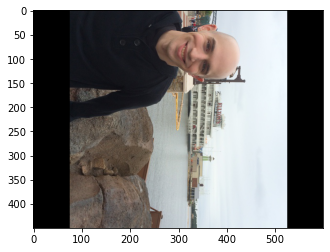

In [7]:

# rotate our image by -90 degrees
M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))


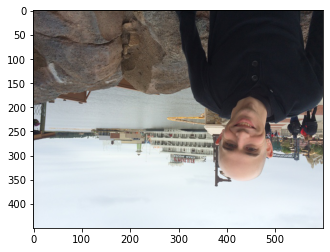

In [8]:
# finally, let's use our helper function in imutils to rotate the image by
# 180 degrees (flipping it upside down)
rotated = imutils.rotate(image, 180)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))

In [ ]:
################################################################################
#
#       1.4.3 Resizing      R (rotated) = I(input)*M(rotation_matrix)
#
################################################################################

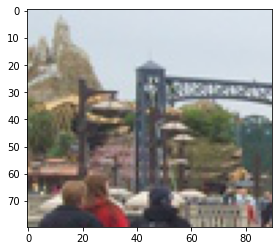

In [9]:
# load the image and show it
image4resize = image[120:200, 10:100]
plt.imshow(cv2.cvtColor(image4resize, cv2.COLOR_BGR2RGB))


In [10]:
# we need to keep in mind aspect ratio so the image does not look skewed or distorted 
# therefore, we calculate the ratio of the new image to the old image. 

# Let's make our new image have a width of 150 pixels
width_new = 150.0
width_old = image4resize.shape[1]
height_old = image4resize.shape[0]

r         = width_new / width_old
dim_new   = ( int(width_new), int(height_old * r))

# perform the actual resizing of the image
resized = cv2.resize(image4resize, dim_new, interpolation=cv2.INTER_AREA)

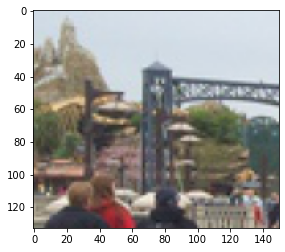

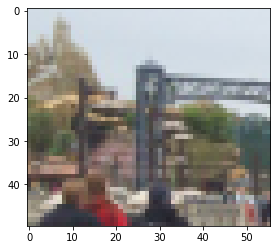

In [13]:
# what if we wanted to adjust the height of the image? We can apply
# the same concept, again keeping in mind the aspect ratio, but instead
# calculating the ratio based on height -- let's make the height of the
# resized image 50 pixels
r = 50.0 / image4resize.shape[0]
dim = (int(image4resize.shape[1] * r), 50)

# perform the resizing
resized = cv2.resize(image4resize, dim, interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))


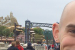

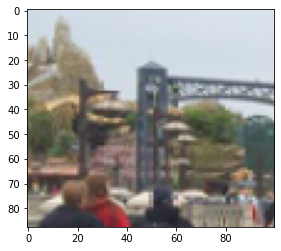

In [14]:
# of course, calculating the ratio each and every time we want to resize
# an image is a real pain -- let's create a  function where we can specify
# our target width or height, and have it take care of the rest for us.
resized = imutils.resize(image4resize, width=100)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))


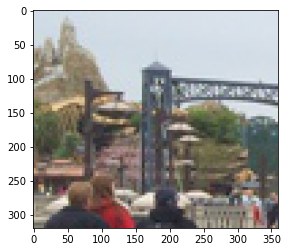

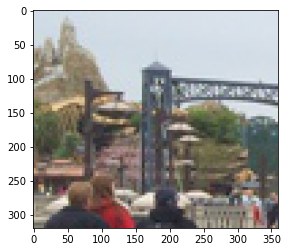

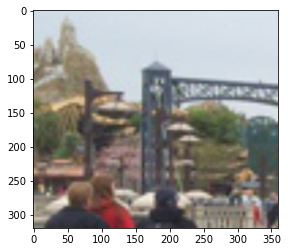

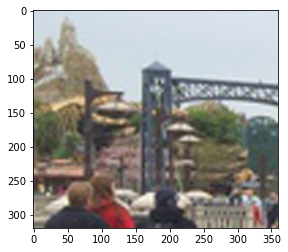

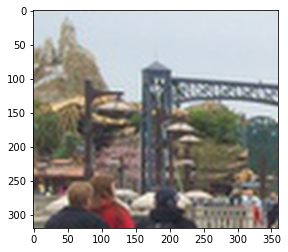

In [17]:
# construct the list of interpolation methods
methods = [
	("cv2.INTER_NEAREST", cv2.INTER_NEAREST   ),
    ("cv2.INTER_AREA",    cv2.INTER_AREA      ),
	("cv2.INTER_LINEAR",  cv2.INTER_LINEAR    ),	
	("cv2.INTER_CUBIC",   cv2.INTER_CUBIC     ),
	("cv2.INTER_LANCZOS4",cv2.INTER_LANCZOS4  )]

# loop over the interpolation methods
for (name, method) in methods:
	
  # increase the size of the image by 3x using the current interpolation method

	resized = imutils.resize(image4resize, width=image4resize.shape[1] *4, inter=method)
	plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
	plt.show()


In [ ]:
#   When enlarging / increasing / upsampling  go for  INTER_LINEAR or INTER_CUBIC
#
#   When shrinking / decresing  / downsampling go for INTER_AREA

In [ ]:
################################################################################
#
#       1.4.4 Flipping
#
################################################################################

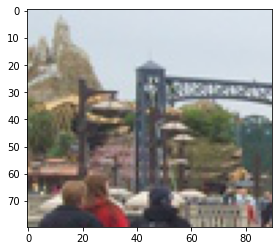

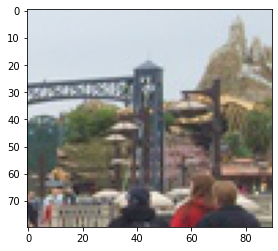

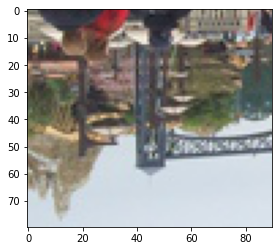

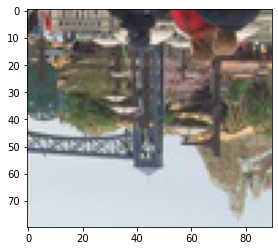

In [19]:
# load the image and show it
plt.imshow(cv2.cvtColor(image4resize, cv2.COLOR_BGR2RGB))
plt.show()

# flip the image horizontally
flipped = cv2.flip(image4resize, 1)
plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB))
plt.show()

# flip the image vertically
flipped = cv2.flip(image4resize, 0)
plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB))
plt.show()

# flip the image along both axes
flipped = cv2.flip(image4resize, -1)
plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
################################################################################
#
#       1.4.5 Cropping
#
################################################################################

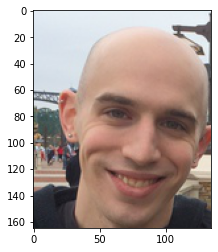

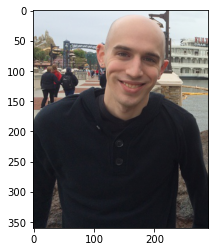

In [20]:
# cropping an image is accomplished using simple NumPy array slices --
# let's crop the face from the image
face = image[85:250, 85:220]
plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
plt.show()

# ...and now let's crop the entire body
body = image[90:450, 0:290]
plt.imshow(cv2.cvtColor(body, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
################################################################################
#
#       1.4.6 Aritmetic
#
################################################################################

In [ ]:
# load the image and show it
cv2_imshow( image)

In [21]:
# images are NumPy arrays, stored as unsigned 8 bit integers -- this
# implies that the values of our pixels will be in the range [0, 255]; when
# using functions like cv2.add and cv2.subtract, values will be clipped
# to this range, even if the added or subtracted values fall outside the
# range of [0, 255]. Check out an example:
print("max of 255: {}".format(str( cv2.add(      np.uint8([200]), np.uint8([100])  ))))
print("min of 0: {}"  .format(str( cv2.subtract( np.uint8([50]),  np.uint8([100])  ))))

max of 255: [[255]]
min of 0: [[0]]


In [22]:
# NOTE: if you use NumPy arithmetic operations on these arrays, the value
# will be modulo (wrap around) instead of being  clipped to the [0, 255]
# range. This is important to keep in mind when working with images.
print("wrap around: {}".format(str( np.uint8([200]) + np.uint8([100])  )))
print("wrap around: {}".format(str( np.uint8([50])  - np.uint8([100])  )))

wrap around: [44]
wrap around: [206]


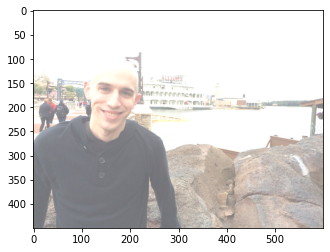

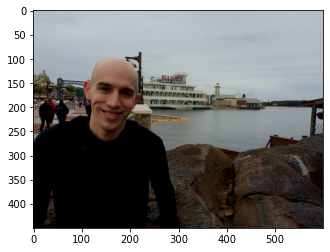

In [23]:
# let's increase the intensity of all pixels in our image by 100 
# we accomplish this by constructing a NumPy array that is the same size of
# our matrix (filled with ones) and the multiplying it by 100 to create an
# array filled with 100's, then we simply add the images together; notice
# how the image is "brighter"
M = np.ones(image.shape, dtype = "uint8") * 100
added = cv2.add(image, M)
plt.imshow(cv2.cvtColor(added, cv2.COLOR_BGR2RGB))
plt.show()

# similarly, we can subtract 50 from all pixels in our image and make it darker
M = np.ones(image.shape, dtype = "uint8") * 50
subtracted = cv2.subtract(image, M)
plt.imshow(cv2.cvtColor(subtracted, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
################################################################################
#
#       1.4.7  Bitwise operations
#
################################################################################

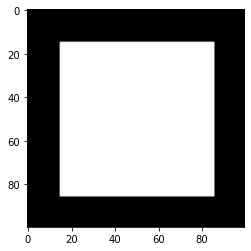

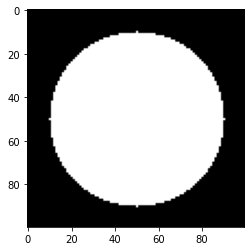

In [29]:
# first, let's draw a rectangle
rectangle_canvas = np.zeros((100, 100), dtype = "uint8")
cv2.rectangle( rectangle_canvas, (15, 15), (85, 85), 255, -1)
plt.imshow(cv2.cvtColor(rectangle_canvas, cv2.COLOR_BGR2RGB))
plt.show()

# secondly, let's draw a circle
circle_canvas = np.zeros((100, 100), dtype = "uint8")
cv2.circle( circle_canvas, (50, 50), 40, 255, -1)
plt.imshow(cv2.cvtColor(circle_canvas, cv2.COLOR_BGR2RGB))
plt.show()

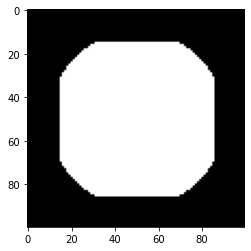

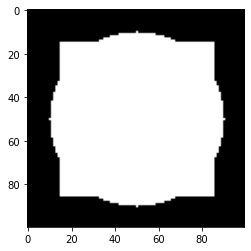

In [32]:
# A bitwise 'AND' is only True when both rectangle and circle have
# a value that is 'ON.' Simply put, the bitwise AND function
# examines every pixel in rectangle and circle. If both pixels
# have a value greater than zero, that pixel is turned 'ON' (i.e
# set to 255 in the output image). If both pixels are not greater
# than zero, then the output pixel is left 'OFF' with a value of 0.
plt.imshow(cv2.cvtColor(cv2.bitwise_and(rectangle_canvas, circle_canvas), cv2.COLOR_BGR2RGB))
plt.show()


# A bitwise 'OR' examines every pixel in rectangle and circle. If
# EITHER pixel in rectangle or circle is greater than zero, then
# the output pixel has a value of 255, otherwise it is 0.
plt.imshow(cv2.cvtColor( cv2.bitwise_or(rectangle_canvas, circle_canvas) , cv2.COLOR_BGR2RGB))
plt.show()

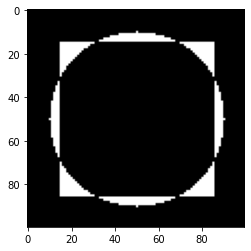

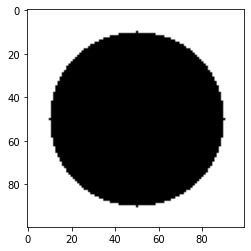

In [34]:
# The bitwise 'XOR' is identical to the 'OR' function, with one
# exception: both rectangle and circle are not allowed to BOTH
# have values greater than 0.
plt.imshow(cv2.cvtColor(cv2.bitwise_xor(rectangle_canvas, circle_canvas), cv2.COLOR_BGR2RGB))
plt.show()

# Finally, the bitwise 'NOT' inverts the values of the pixels. Pixels
# with a value of 255 become 0, and pixels with a value of 0 become 255.
plt.imshow(cv2.cvtColor( cv2.bitwise_not(circle_canvas) , cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
################################################################################
#
#       1.4.8 Masking
#
################################################################################

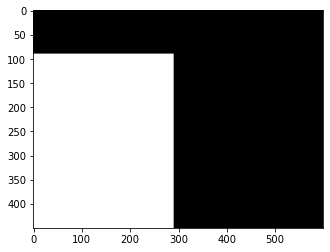

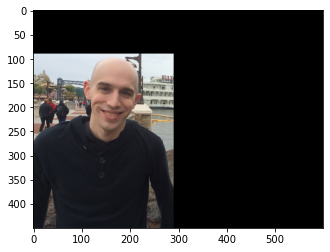

In [27]:
# Masking allows us to focus only on parts of an image that interest us.
# A mask is the same size as our image, but has only two pixel values, 0 and 255. 
# Pixels with a value of 0 are ignored in the orignal image, and mask pixels 
# with a value of 255 are allowed to be kept. For example,let's construct a 
# rectangular mask that displays only the person in the image

our_mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle( our_mask, (0, 90), (290, 450), 255, -1)
plt.imshow(cv2.cvtColor(our_mask, cv2.COLOR_BGR2RGB))
plt.show()

# Apply our mask -- notice how only the person in the image is cropped out
plt.imshow(cv2.cvtColor(cv2.bitwise_and(image, image, mask=our_mask), cv2.COLOR_BGR2RGB))
plt.show()

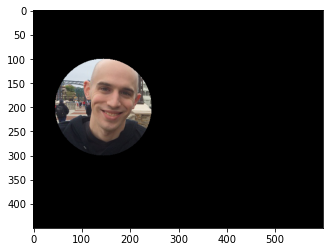

In [26]:
# Now, let's make a circular mask with a radius of 100 pixels and apply the mask again
our_mask  = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(our_mask, (145, 200), 100, 255, -1)
plt.imshow(  cv2.cvtColor( cv2.bitwise_and(image, image, mask=our_mask), cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
################################################################################
#
#       1.4.9  Splitting and merging channels 
#
################################################################################

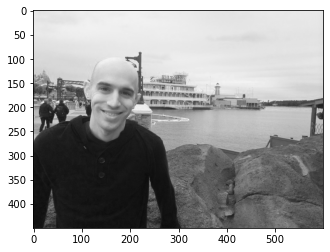

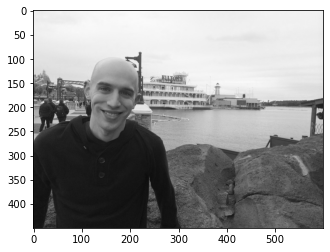

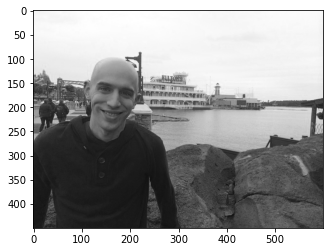

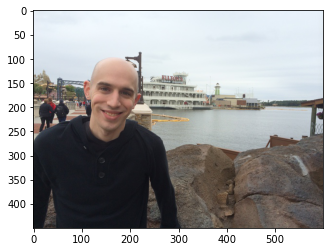

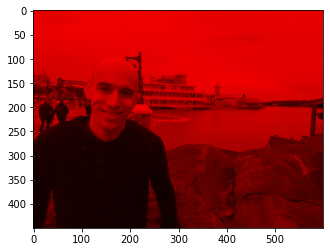

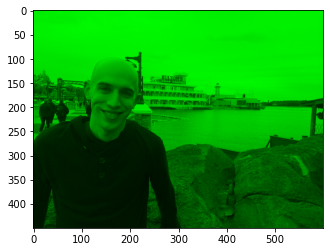

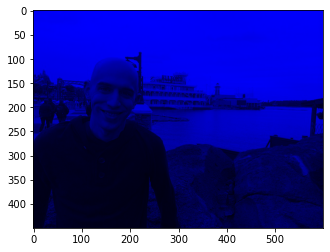

In [25]:
# Load the image and grab each channel: Red, Green, and Blue. It's
# important to note that OpenCV stores an image as NumPy array with
# its channels in reverse order! When we call cv2.split, we are
# actually getting the channels as Blue, Green, Red!

(B, G, R) = cv2.split(image)

# show each channel individually
plt.imshow(cv2.cvtColor(R, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(G, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(B, cv2.COLOR_BGR2RGB))
plt.show()


# merge the image back together again
merged = cv2.merge([B, G, R])
plt.imshow(cv2.cvtColor(merged, cv2.COLOR_BGR2RGB))
plt.show()
cv2.destroyAllWindows()

# visualize each channel in color
zeros = np.zeros(image.shape[:2], dtype = "uint8")
plt.imshow(  cv2.cvtColor(    cv2.merge([zeros, zeros, R])   , cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(  cv2.cvtColor(    cv2.merge([zeros, G, zeros])   , cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(  cv2.cvtColor(    cv2.merge([B, zeros, zeros])   , cv2.COLOR_BGR2RGB))
plt.show()
